In [ ]:
# entrainement de modèles : prétraitement des donnees d'entrainement

In [131]:
!pip install unicode
!pip install wordcloud

In [25]:
# sauver le fichier de test en pickle
import csv
import pickle
liste_dico = list()

with open('testdata.csv', newline='') as csvfile:
    data_reader = csv.reader(csvfile)
    dico = dict()
    for row in data_reader:
        dico['id'] = row[1]
        dico['text'] = row[len(row)-1]
        p = row[0]
        if p=='4':
            dico['polarity'] = 'positive'
        elif p=='2':
            dico['polarity'] = 'neutral'
        elif p=='0' :
            dico['polarity'] = 'negative'
        liste_dico.append(dico)
        dico = dict()

with open('group10_sentiment140_rawdata.pickle', 'wb') as f:
    pickle.dump(liste_dico, f)

In [26]:
# prétraitement champ texte
import unicodedata
import re
def normalisation(s):
    s = re.sub(r'http\S+', '', s) # supprime les liens de la chaine
    s = re.sub('[^a-zA-Z0-9\n\. ]', '', s)
    
    try:
        text = s.lower()
        text = unicode(text,'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore') # supprime les accents de la chaine
          
    return str(text, 'utf-8')


In [21]:
# traitmenent des donnees brutes et sauvegarde 
def traitement():
    with open('group10_sentiment140_rawdata.pickle', 'rb') as f1:
        liste = pickle.load(f1) 
    liste_dictionnnaire = list()
    for i in range (len(liste)):
        for k in liste[i]: 
            liste[i]['text'] = normalisation(liste[i]['text'])
            if k=="polarity":
                if liste[i][k]== "positive":
                    liste[i][k] = 1
                elif liste[i][k]== "negative":
                    liste[i][k] = -1            
                else:
                    liste[i][k] = 0

    return liste


In [22]:
# sauvegarde du prétraitement

with open('group10_sentiment140_preprocessed.pickle', 'wb') as f:
    pickle.dump(traitement(), f)

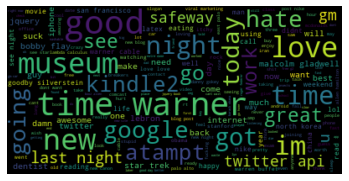

In [23]:
# statistiques
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
with open('group10_sentiment140_preprocessed.pickle', 'rb') as f1:
    OL = pickle.load(f1)
text = ""
for i in range(len(OL)):
    for k in OL[i]:
        text = text + OL[i]['text']
            
wc = WordCloud(max_font_size=40).generate(text)
wc.to_file('output.png')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

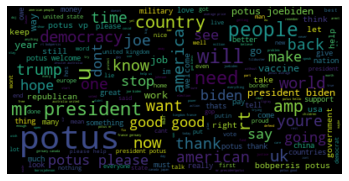

In [27]:
# deuxième représentation sous forme d'histogramme
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
with open('group10_data@POTUS_projectdatabis.pickle', 'rb') as f1:
    OL = pickle.load(f1)
text = ""
for d in OL:
    text = text + normalisation(d['full_text'])
            
wc = WordCloud(max_font_size=40).generate(text)
wc.to_file('output.png')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()